In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

<h1>Linear Damage</h1>

In [16]:
df = pd.read_csv('input/results_complete_linear.csv')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['elem_damaged', 'damage'], axis=1), df['elem_damaged'], test_size=0.10, random_state=41)

In [18]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

In [19]:
%%time
path = 'models/linear_class'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(126)))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.6), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.6), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.6), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(129, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 80)                10160     
                                                                 
 dense_5 (Dense)             (None, 80)                6480      
                                                                 
 dense_6 (Dense)             (None, 80)                6480      
                                                                 
 dense_7 (Dense)             (None, 129)               10449     
                                                                 
Total params: 33,569
Trainable params: 33,569
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
726/726 [==============================] - 1s 2ms/step - loss: 4.5489 - accuracy: 0.0835 - val_loss: 4.2170 - val_accuracy: 0.1391
Epoch 2/1000
726/726 [================

INFO:tensorflow:Assets written to: models/linear_class/assets


INFO:tensorflow:Assets written to: models/linear_class/assets


CPU times: user 29min 11s, sys: 3min 52s, total: 33min 3s
Wall time: 17min 23s


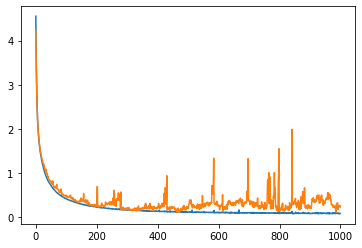

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [21]:
pred = model.predict(X_test)

<h3>Classification Report</h3>

In [22]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.95      1.00      0.97        18
           2       1.00      0.96      0.98        23
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        23
           5       1.00      0.90      0.95        20
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00        13
          10       0.91      0.91      0.91        23
          11       1.00      0.94      0.97        17
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00        31
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        25
          17       1.00    

<h1>Exponential Damage</h1>

In [24]:
df_exp = pd.read_csv('input\\results_complete_exponential.csv')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_exp.drop(['elem_damaged', 'damage'], axis=1), df_exp['elem_damaged'], test_size=0.10, random_state=41)

In [26]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

In [27]:
%%time
path = 'models\\exp_class'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(126)))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.6), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.6), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.6), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(129, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 80)                10160     
                                                                 
 dense_9 (Dense)             (None, 80)                6480      
                                                                 
 dense_10 (Dense)            (None, 80)                6480      
                                                                 
 dense_11 (Dense)            (None, 129)               10449     
                                                                 
Total params: 33,569
Trainable params: 33,569
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
726/726 [==============================] - 1s 1ms/step - loss: 4.9790 - accuracy: 0.0183 - val_loss: 4.8442 - val_accuracy: 0.0167
Epoch 2/1000
726/726 [================

INFO:tensorflow:Assets written to: models\exp\assets


INFO:tensorflow:Assets written to: models\exp\assets


Wall time: 14min 29s


In [29]:
pred = model.predict(X_test)

81/81 [==============================] - 0s 810us/step


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

<h3>Classification Report</h3>

In [31]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      0.94      0.97        18
           2       1.00      0.83      0.90        23
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        23
           5       0.55      0.30      0.39        20
           6       1.00      0.96      0.98        23
           7       0.89      1.00      0.94        25
           8       1.00      0.96      0.98        25
           9       1.00      1.00      1.00        13
          10       0.40      0.96      0.56        23
          11       1.00      0.94      0.97        17
          12       1.00      0.81      0.90        16
          13       1.00      1.00      1.00        31
          14       1.00      0.97      0.98        30
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        25
          17       1.00    

C:\Users\Gabriel\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gabriel\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gabriel\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

<h1>Sigmoid-like Damage</h1>

In [5]:
df_sig = pd.read_csv('input/results_complete_sigmoid_like.csv')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_sig.drop(['elem_damaged', 'damage'], axis=1), df_sig['elem_damaged'], test_size=0.10, random_state=41)

In [7]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

In [8]:
%%time
path = 'models\\sig_class'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(126)))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.6), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.6), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.6), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(129, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                10160     
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 80)                6480      
                                                                 
 dense_3 (Dense)             (None, 129)               10449     
                                                                 
Total params: 33,569
Trainable params: 33,569
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
726/726 [==============================] - 2s 2ms/step - loss: 4.8608 - accuracy: 0.0188 - val_loss: 4.7218 - val_accuracy: 0.0512
Epoch 2/1000
726/726 [==================

INFO:tensorflow:Assets written to: models\sig_class/assets


INFO:tensorflow:Assets written to: models\sig_class/assets


CPU times: user 30min 10s, sys: 4min 9s, total: 34min 19s
Wall time: 17min 6s


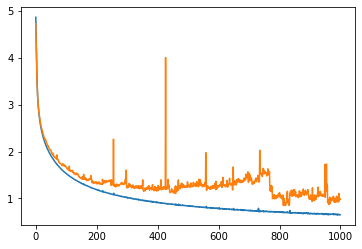

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [10]:
pred = model.predict(X_test)

<h3>Classification Report</h3>

In [11]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       1.00      0.89      0.94        18
           2       1.00      0.78      0.88        23
           3       1.00      0.95      0.97        20
           4       0.88      0.91      0.89        23
           5       0.86      0.30      0.44        20
           6       1.00      0.78      0.88        23
           7       1.00      0.84      0.91        25
           8       1.00      0.88      0.94        25
           9       0.63      0.92      0.75        13
          10       0.70      0.70      0.70        23
          11       1.00      0.82      0.90        17
          12       1.00      0.81      0.90        16
          13       0.74      0.84      0.79        31
          14       1.00      0.73      0.85        30
          15       1.00      0.95      0.97        19
          16       1.00      0.84      0.91        25
          17       1.00    